In [1]:
#We are importing the librariers are going to be use in this project and read the prosper loan data to start.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
pd.read_csv('prosperLoanData.csv')

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,20
5,0F05359734824199381F61D,1074836,26:37.1,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
6,0F0A3576754255009D63151,750899,52:56.1,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,49:27.5,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,43:39.1,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,43:39.1,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1


### Wrangling Data

In [2]:
#We need to know the number of entries and how many variables have missing data. This is to start cleaning it. 
df = pd.read_csv('prosperLoanData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [3]:
# We also want to know the shape and statistic results to see how we can adress problems. 
print(df.shape)
df.describe()

(113937, 81)


,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [4]:
# creating a copy of the main data will allow us to clean it safely without disturbing the main data. 
#then we want to know if our new data name is the same as the original.
df_clean = df.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
# the variable Borrower APR has missing number but only about 20, since we do not have this information,
#we can drop the entries that are missing from Borrower APR
df_clean.dropna(subset = ['BorrowerAPR'], inplace=True)

In [6]:
#After all entries from Borrower APR are dropped, we have a new total of entries of 113912.
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113912 non-null object
ListingNumber                          113912 non-null int64
ListingCreationDate                    113912 non-null object
CreditGrade                            28928 non-null object
Term                                   113912 non-null int64
LoanStatus                             113912 non-null object
ClosedDate                             55064 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113912 non-null float64
LenderYield                            113912 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [7]:
#Now we want to get only some important variables, the variables we want to work with.
df_clean.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [8]:
#In here we drop all other variables we are not selecting for this project. 
df_clean.drop(axis = 1, columns=['ListingKey','ListingNumber', 'ListingCreationDate','EstimatedEffectiveYield',
                                       'EstimatedReturn','ProsperRating (numeric)','ProsperRating (Alpha)',
                                       'ProsperScore','BorrowerState','MemberKey','EmploymentStatus','EmploymentStatusDuration',
                                       'IsBorrowerHomeowner','CurrentlyInGroup','GroupKey','CreditScoreRangeLower',
                                       'CreditScoreRangeUpper','FirstRecordedCreditLine','CurrentCreditLines','TotalCreditLinespast7years',
                                       'TotalCreditLinespast7years','OpenRevolvingAccounts','OpenRevolvingMonthlyPayment',
                                       'InquiriesLast6Months','TotalInquiries','CurrentDelinquencies','DelinquenciesLast7Years',
                                       'PublicRecordsLast10Years','PublicRecordsLast12Months','BankcardUtilization','TotalTrades',
                                       'TradesNeverDelinquent (percentage)','TradesOpenedLast6Months','DebtToIncomeRatio',
                                       'StatedMonthlyIncome','LoanKey','TotalProsperPaymentsBilled','OnTimeProsperPayments',
                                       'ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalOutstanding',
                                       'ScorexChangeAtTimeOfListing','LoanCurrentDaysDelinquent','LoanFirstDefaultedCycleNumber',
                                       'LoanMonthsSinceOrigination','LoanOriginationQuarter','LP_CustomerPayments','LP_CustomerPrincipalPayments',
                                       'LP_InterestandFees','LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss','LP_NetPrincipalLoss',
                                       'LP_NonPrincipalRecoverypayments','InvestmentFromFriendsCount','EstimatedLoss',
                                       'DateCreditPulled','LoanOriginationDate','InvestmentFromFriendsAmount','LoanNumber',
                                'PercentFunded','Term','TotalProsperLoans','ProsperPrincipalBorrowed'], inplace=True)

In [9]:
#This shows with which variables we are working with.
df_clean.columns

Index(['CreditGrade', 'LoanStatus', 'ClosedDate', 'BorrowerAPR',
       'BorrowerRate', 'LenderYield', 'ListingCategory (numeric)',
       'Occupation', 'OpenCreditLines', 'AmountDelinquent',
       'RevolvingCreditBalance', 'AvailableBankcardCredit', 'IncomeRange',
       'IncomeVerifiable', 'LoanOriginalAmount', 'MonthlyLoanPayment',
       'Recommendations', 'Investors'],
      dtype='object')

In [10]:
# Now we have a new information from this new variables set, and we can start cleaning them.
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 18 columns):
CreditGrade                  28928 non-null object
LoanStatus                   113912 non-null object
ClosedDate                   55064 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113912 non-null float64
LenderYield                  113912 non-null float64
ListingCategory (numeric)    113912 non-null int64
Occupation                   110349 non-null object
OpenCreditLines              106333 non-null float64
AmountDelinquent             106315 non-null float64
RevolvingCreditBalance       106333 non-null float64
AvailableBankcardCredit      106393 non-null float64
IncomeRange                  113912 non-null object
IncomeVerifiable             113912 non-null bool
LoanOriginalAmount           113912 non-null int64
MonthlyLoanPayment           113912 non-null float64
Recommendations              113912 non-null int64
Inve

In [11]:
#The credit grade varible miss many numbers, we want to know which are the already existed choices for credit grade. 
df_clean.CreditGrade.value_counts()

C     5646
D     5152
B     4387
HR    3506
AA    3495
A     3314
E     3288
NC     140
Name: CreditGrade, dtype: int64

In [12]:
# Occupation also miss data and we want to replace with No job statement to clean the data set. 
df_clean.Occupation[df.Occupation == 'No job'].count()

0

In [13]:
# Open credit lines also miss data and I wanted to know if they already used 0.0 as an entry, which it looks they did.
df_clean.OpenCreditLines[df.OpenCreditLines == 0.0].count()

562

In [14]:
#I do not want to modified the statistics of this variable, so I get the mean of it and that is what I used to replace 
#the missing values
df_clean.OpenCreditLines.mean()

9.260163824964968

In [15]:
# Amount Delinquent also miss data and I wanted to know if they already used 0.0 as an entry, which it looks they did.
df_clean.AmountDelinquent[df.AmountDelinquent == 0.0].count()

89818

In [16]:
#I do not want to modified the statistics of this variable, so I get the mean of it and that is what I used to replace 
#the missing values
df_clean.AmountDelinquent.mean()

984.5070592108357

In [17]:
# Revolving Credit Balance also miss data and I wanted to know if they already used 0.0 as an entry, which it looks they did.
df_clean.RevolvingCreditBalance[df.RevolvingCreditBalance == 0.0].count()

4059

In [18]:
#I do not want to modified the statistics of this variable, so I get the mean of it and that is what I used to replace 
#the missing values
df_clean.RevolvingCreditBalance.mean()

17598.706751431822

In [19]:
# Available Bank Card Credit also miss data and I wanted to know if they already used 0.0 as an entry, which it looks they did.
df_clean.AvailableBankcardCredit[df.AvailableBankcardCredit== 0.0].count()

4881

In [20]:
#I do not want to modified the statistics of this variable, so I get the mean of it and that is what I used to replace 
#the missing values
df_clean.AvailableBankcardCredit.mean()

11210.225447162877

In [21]:
# This code is to replace the missing values with assigned values according to the type of data we have and resuls in the cells
# above. 
values = {'CreditGrade':'Unknown','ClosedDate': '12/31/2024 0:00','Occupation': 'No Job','OpenCreditLines':9.260163824964968,
          'AmountDelinquent':984.5070592108357,'AmountDelinquent':984.5070592108357,'AvailableBankcardCredit':11210.225447162877,
         'RevolvingCreditBalance':17598.706751431822}
df_clean = df_clean.fillna(value=values)

In [22]:
#Now we want to run our information method to find out if we still have missing entries. It looks they are all fine. 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 18 columns):
CreditGrade                  113912 non-null object
LoanStatus                   113912 non-null object
ClosedDate                   113912 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113912 non-null float64
LenderYield                  113912 non-null float64
ListingCategory (numeric)    113912 non-null int64
Occupation                   113912 non-null object
OpenCreditLines              113912 non-null float64
AmountDelinquent             113912 non-null float64
RevolvingCreditBalance       113912 non-null float64
AvailableBankcardCredit      113912 non-null float64
IncomeRange                  113912 non-null object
IncomeVerifiable             113912 non-null bool
LoanOriginalAmount           113912 non-null int64
MonthlyLoanPayment           113912 non-null float64
Recommendations              113912 non-null int64
In

### Data Exploration

In [23]:
#This code is to know what are the choices we have on loan status. I like to organized them when I am plotting 
# the data if it is available.
df_clean.LoanStatus.value_counts()

Current                   56576
Completed                 38049
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

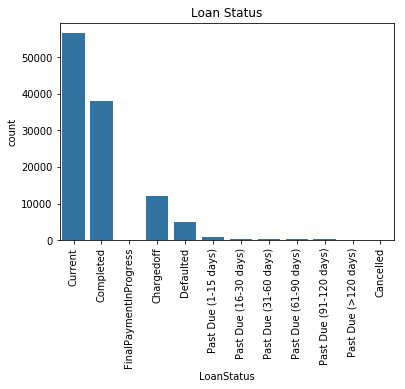

In [24]:
# Now we are looking all the status vs loans. I wanted to see which status has the higest amount of loans.
color_base = sb.color_palette()[0]
sb.countplot(data=df_clean, x='LoanStatus', color = color_base, order = ['Current','Completed','FinalPaymentInProgress','Chargedoff','Defaulted','Past Due (1-15 days)',
                                                                   'Past Due (16-30 days)','Past Due (31-60 days)',
                                                                   'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)',
                                                                   'Cancelled']);
plt.xticks(rotation=90);
plt.title('Loan Status');

We can see how the current status is were most of the loans are at the time the data was taken. Not many loans are in final payment progress.

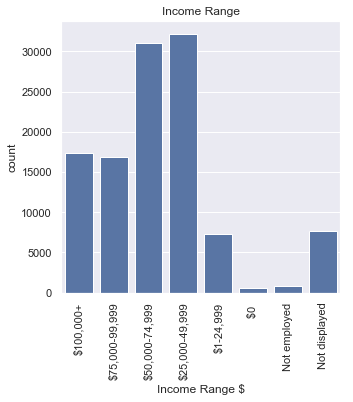

In [198]:
# Now we are looking all the income range vs loans. I wanted to see what is the higest income from loan applicants. 
color_base = sb.color_palette()[0]
sb.countplot(data=df_clean, x='IncomeRange', color = color_base, order = ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999',
                                                                   '$1-24,999','$0 ', 'Not employed','Not displayed']);
plt.xticks(rotation=90);
plt.xlabel('Income Range $')
plt.title('Income Range');

The popular ranges of income are from 25,000 to 74,999. See reference in readme.md for more information.

In [27]:
#This code is to know what are the choices we have on credit grade. I like to organized them when I am plotting 
# the data if it is available.
df_clean.CreditGrade.value_counts()

Unknown    84984
C           5646
D           5152
B           4387
HR          3506
AA          3495
A           3314
E           3288
NC           140
Name: CreditGrade, dtype: int64

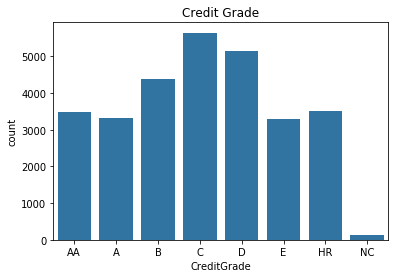

In [57]:
# Now we are looking all the credit grade vs loans. In this code the Unknown has to be dropped out do to its size. 
# I wanted to know what credit grade is the most popular on loan applicants. 
color_base = sb.color_palette()[0]
sb.countplot(data=df_clean[df_clean.CreditGrade != 'Unknown'], x='CreditGrade', color = color_base, order = ['AA','A','B','C','D','E','HR','NC']);
plt.title('Credit Grade');

Most of the loans fall in the unknown credit grade. Since the there is not record of the 'unknown' credit grade, this choice is dropped from the plot. From the plot we can see how the credits are ordered from the AA (best credit grade) to HR (worse credit grade), and NC (no credit grade). Most loan applications fall into the C category of credit grade. 

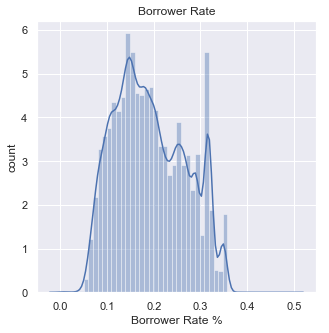

In [199]:
# Now we are looking all the Borrower Rate vs loans. I wanted to know what is the lowest average rate on the loans. 
sb.distplot(df_clean['BorrowerRate']);
plt.ylabel('count');
plt.xlabel('Borrower Rate %')
plt.title('Borrower Rate');

the range of 0.1 to 0.2 is the most common barrower rate. there 4 to 6 loans that falls into a number between 0.1-0.2 and also slightly over 0.3 rate. 

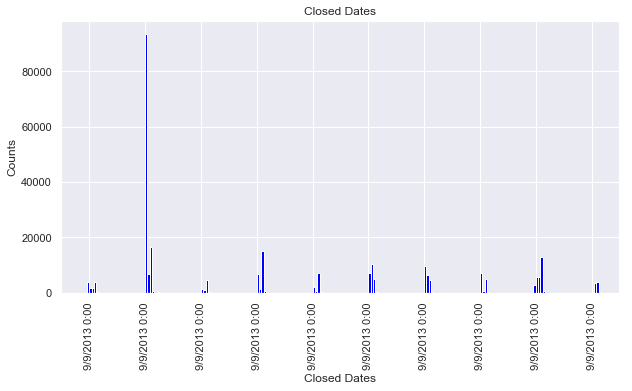

In [157]:
# Now we are looking all the credit grade vs loans. In this code we sort some of the data from the closed dates due to the size
# of the variable.  
df_new = df_clean.sort_values(by=['ClosedDate'], ascending = False)
ax = df_new[10:20].plot.bar(x = 'ClosedDate', rot=90, title = 'Closed Dates', color = 'blue', legend = None);
ax.set_xlabel("Closed Dates");
ax.set_ylabel("Counts");

There are very many Closed Dates. The plot shows only 10 where we can see that on 09/09/2013 there were more than 80,000.

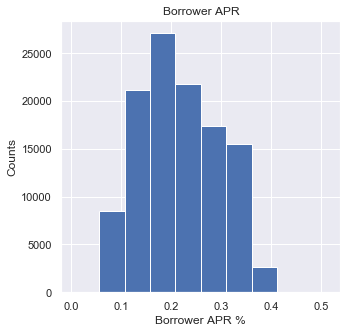

In [200]:
# Now we are looking all the Borrower APR vs loans.I wanted to know what is the lowest average APR on the loans.
csb.distplot(df_clean['BorrowerRate']);
plt.ylabel('count');
plt.xlabel('Borrower Rate %')
plt.title('Borrower Rate');

On the borrower APR, most loans fall in the range of 0.1 to about .25. this is very similar to the results from the Borrower Rate plot.

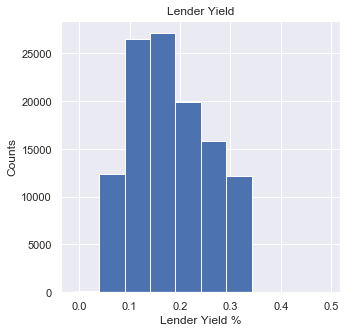

In [201]:
# Now we are looking all the lender Yield vs loans. I wanted to know what is the lowest average yield on the loans.
plt.hist(data = df_clean, x = 'LenderYield');
plt.xlabel('Lender Yield %');
plt.ylabel('Counts');
plt.title('Lender Yield');

The lender yield on most of the loans is also falling in the range of 0.1 to 0.2. Similar to the borrower APR and the borrower Rate.

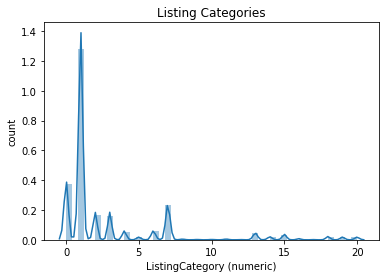

In [36]:
# Now we are looking all the Listing categories vs loans. I wanted to know how many categories have the most loans. 
sb.distplot(df_clean['ListingCategory (numeric)']);
plt.ylabel('count');
plt.title('Listing Categories');

Most loans are within one of the categories of type of loan. 

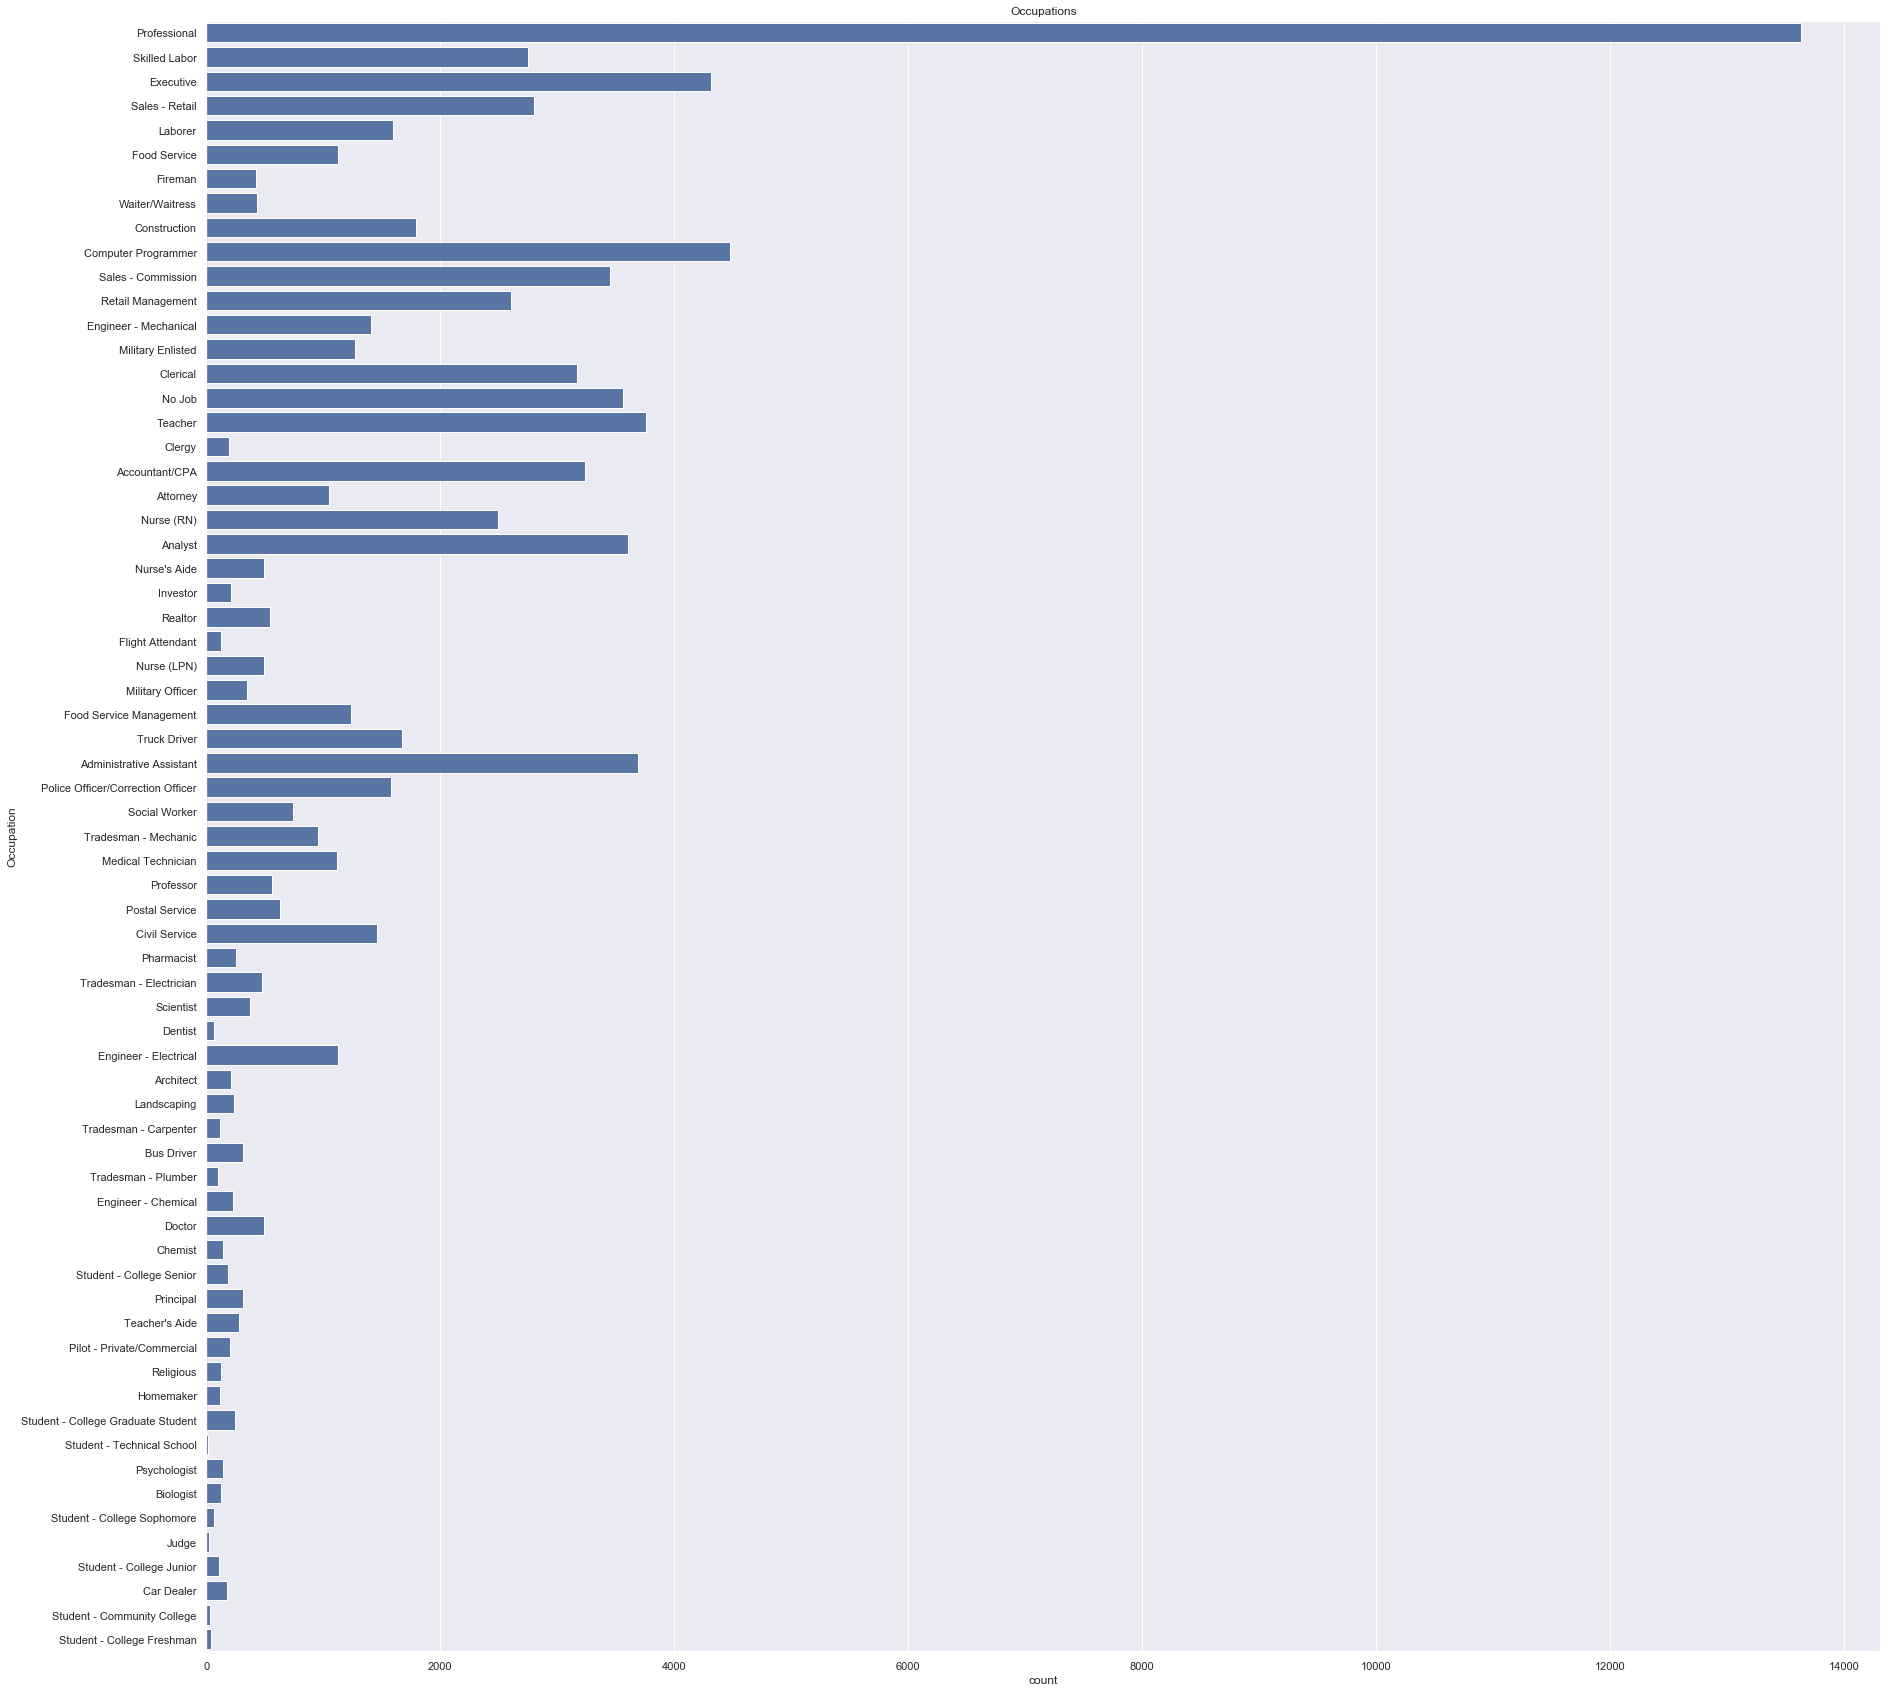

In [116]:
# Now we are looking all the Occupation vs loans.I wanted to know which occupation open more loans. 
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean[df_clean.Occupation != 'Other'], y = 'Occupation', color = base_color);
plt.title('Occupations');
sb.set(rc={'figure.figsize':(30,20)})

In this plot we can see how people in a general professional job has more loan open the time the data was created. Followed by executive and computer programes and the occupation with less loans open is the student-technical school.

Text(0.5, 0, 'Open Credit Lines ')

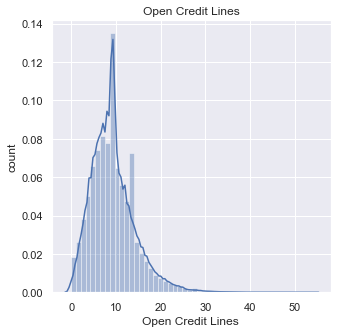

In [202]:
# Now we are looking all the open credit lines vs loans. I wanted to know how many credit lines are open.
sb.distplot(df_clean['OpenCreditLines']);
plt.ylabel('count');
plt.title('Open Credit Lines');
plt.xlabel('Open Credit Lines ');

the average on open credit lines is about 10.

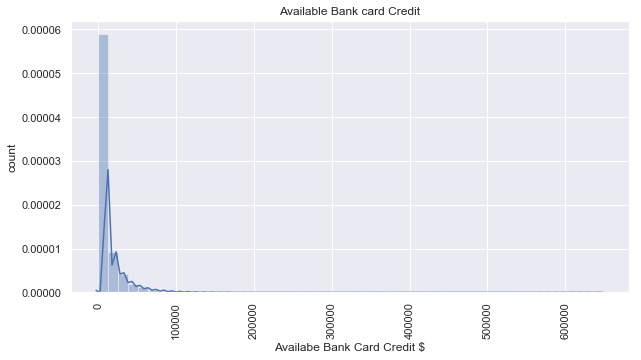

In [211]:
# Now we are looking all the available bank card credit vs loans. I wanted to know how much of bank card credit is available.  
sb.distplot(df_clean['AvailableBankcardCredit']);
plt.ylabel('count');
plt.xlabel('Availabe Bank Card Credit $');
plt.xticks(rotation=90);
plt.title('Available Bank card Credit');
sb.set(rc={'figure.figsize':(10,20)})

A very small percentage of loans have available bank card credit. 

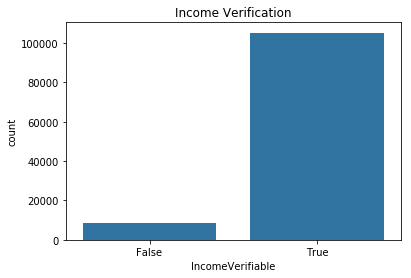

In [40]:
# Now we are looking all the Income Verifiable vs loans. I wanted to know how many loans are not verified. 
sb.distplot(df_clean['BorrowerRate']);
plt.ylabel('count');
plt.xlabel('Borrower Rate %');

Most loan applicans have their income verified.

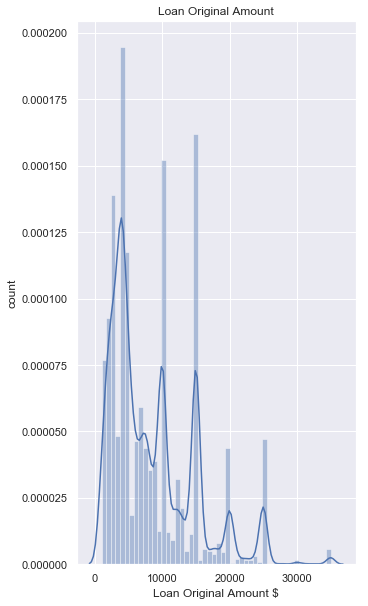

In [216]:
# Now we are looking all the Loan Original Amount vs loans. I wanted to know what is the higest original amount. 
sb.distplot(df_clean['LoanOriginalAmount']);
plt.ylabel('count');
plt.xlabel('Loan Original Amount $');
plt.title('Loan Original Amount');
sb.set(rc={'figure.figsize':(1,10)})

The most frecuent loan Original Amount is about 5000.

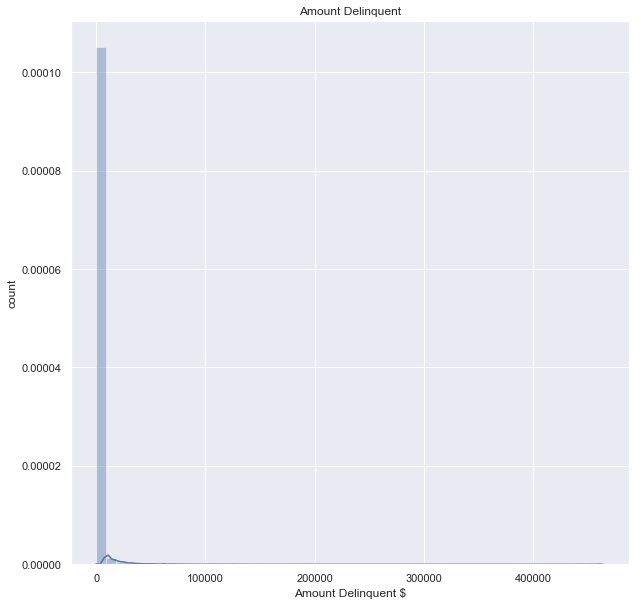

In [222]:
# Now we are looking all the Amount Delinquent vs loans.I wanted to know the amount linquent throughout the loans. 
sb.distplot(df_clean['AmountDelinquent']);
plt.ylabel('count');
plt.xlabel('Amount Delinquent $');
plt.title('Amount Delinquent');
sb.set(rc={'figure.figsize':(1,10)})

More loans have 0 Amount Delinquent recorded.

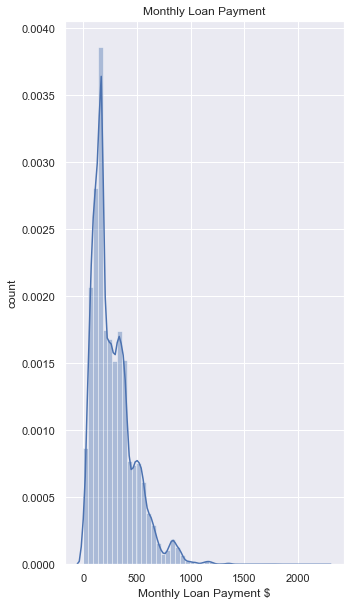

In [179]:
# Now we are looking all the Monthly loan paynent vs loans. I wanted to know the most average monthly payment. 
sb.distplot(df_clean['MonthlyLoanPayment']);
plt.ylabel('count');
plt.xlabel('Monthly Loan Payment $');
plt.title('Monthly Loan Payment');
sb.set(rc={'figure.figsize':(5,5)})

Most loan payments are between $0 to $500.

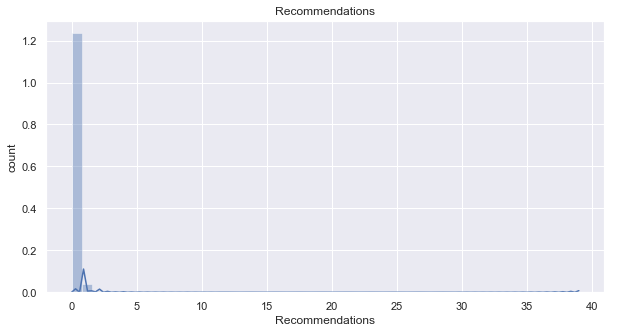

In [192]:
# I wanted to see how many recommendations are per loan. 
sb.distplot(df_clean['Recommendations']);
plt.ylabel('count');
plt.xlabel('Recommendations');
plt.title('Recommendations');
sb.set(rc={'figure.figsize':(5,5)})

Most loans had at least one recomendation. 

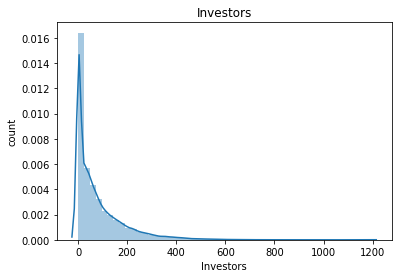

In [83]:
#I wanted to know how many investors participate on loans. 
sb.distplot(df_clean['Investors']);
plt.ylabel('count');
plt.xlabel('Investors');
plt.title('Investors');

less than 0.2 percent loans have 400 investors. 

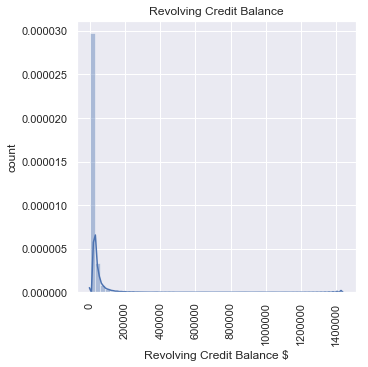

In [195]:
#I wanted to know how much of revolving credit balance existed among the loans. 
sb.distplot(df_clean['RevolvingCreditBalance']);
plt.ylabel('count');
plt.xlabel('Revolving Credit Balance $');
plt.title('Revolving Credit Balance');
plt.xticks(rotation=90);

Most loans had not revolving credit balance. 

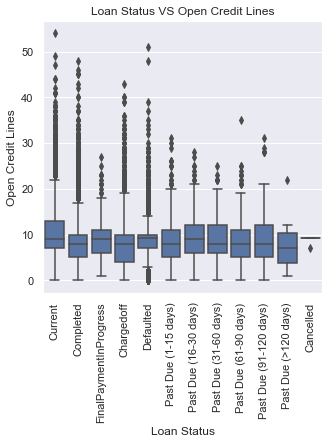

In [226]:
# This plot is loan status vs Open credit lines. I wanted to see how open credit lines affect the loan status. 
color_base = sb.color_palette()[0]
sb.boxplot(data = df_clean, x = 'LoanStatus', y = 'OpenCreditLines',color = color_base, order = ['Current','Completed','FinalPaymentInProgress','Chargedoff','Defaulted','Past Due (1-15 days)',
                                                                   'Past Due (16-30 days)','Past Due (31-60 days)',
                                                                   'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)',
                                                                   'Cancelled'] );
plt.xticks(rotation=90);
plt.xlabel('Loan Status');
plt.ylabel('Open Credit Lines');
plt.title('Loan Status VS Open Credit Lines');
sb.set(rc={'figure.figsize':(10,20)})

Most loans have about 10 credit lines open.

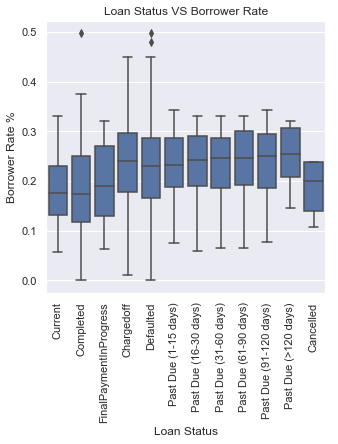

In [250]:
# Next plot is loan status vs borrower rate. I wanted to know how much rate has each loan status. 
color_base = sb.color_palette()[0]
sb.boxplot(data = df_clean, x = 'LoanStatus', y = 'BorrowerRate',color = color_base, order = ['Current','Completed','FinalPaymentInProgress','Chargedoff','Defaulted','Past Due (1-15 days)',
                                                                   'Past Due (16-30 days)','Past Due (31-60 days)',
                                                                   'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)',
                                                                   'Cancelled'] );
plt.xticks(rotation=90);
plt.xlabel('Loan Status');
plt.ylabel('Borrower Rate %');
plt.title('Loan Status VS Borrower Rate');

The best borrowed rate which is below 0.20 falls within the completed and current loans. The worse rates fall among the past due loans which is spected. 

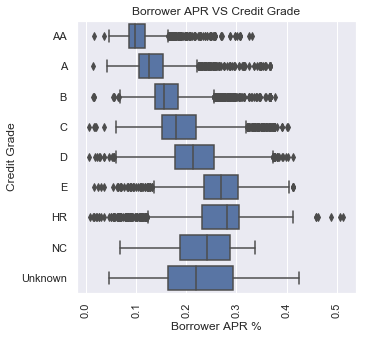

In [236]:
#This plot is borrower APR vs credit grade. I wanted to know how much change the APR according to the credit grade. 
color_base = sb.color_palette()[0]
sb.boxplot(data = df_clean, x = 'BorrowerAPR', y = 'CreditGrade', color = color_base, order = ['AA','A','B','C','D','E','HR','NC','Unknown']);
plt.xticks(rotation=90);
plt.xlabel('Borrower APR %');
plt.ylabel('Credit Grade');
plt.title('Borrower APR VS Credit Grade');
sb.set(rc={'figure.figsize':(1,10)})

The better credit grade has the least borrower APR. We can notice that the Not credit has better APR than the E or HR credit grade. 

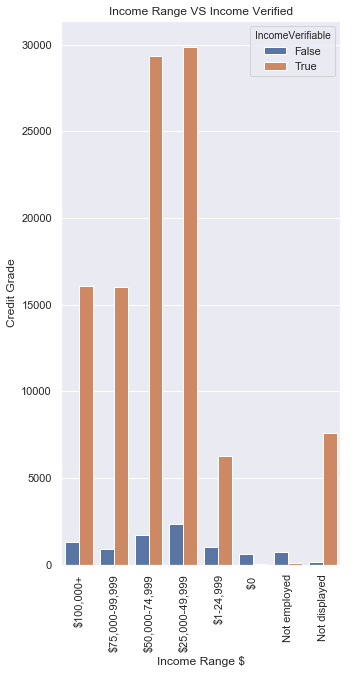

In [243]:
#This plot is Income range vs income verifiable. I wanted to know if there is an especific income range more prompt to be
#verified, this is because there are false entries in income verifieable. 
sb.countplot(data = df_clean, x = 'IncomeRange', hue = 'IncomeVerifiable', order = ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999',
                                                                   '$1-24,999','$0 ', 'Not employed','Not displayed']);
plt.xticks(rotation=90);
plt.xlabel('Income Range $');
plt.ylabel('Credit Grade');
plt.title('Income Range VS Income Verified');
sb.set(rc={'figure.figsize':(5,5)})

Most loans have their income verifies according to this plot. 

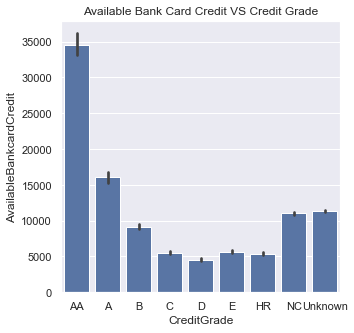

In [244]:
#In this plot we check the credit grade vs available bank card credit. This is to know how much of available bank credit are per
#credit grade. 
base_color = sb.color_palette()[0]
sb.barplot(data = df_clean, x = 'CreditGrade', y = 'AvailableBankcardCredit', color = base_color, order = ['AA','A','B','C','D','E','HR','NC','Unknown']);
plt.title('Available Bank Card Credit VS Credit Grade');

The highest bank card credit amount is for the credit grade AA which is as expected. Is it interested to see how the NC has a higher bank card credit amount than the B to HR.   

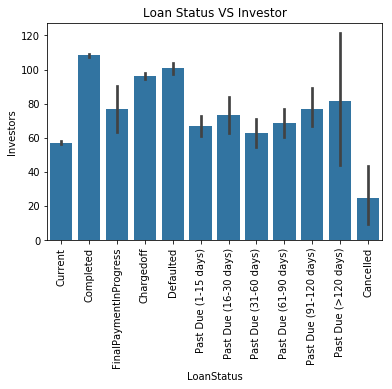

In [105]:
#This plot is loan status vs investors. I would like to know if having many investors correlates with the loan status. 
base_color = sb.color_palette()[0]
sb.barplot(data = df_clean, x = 'LoanStatus', y = 'Investors', color = base_color,  order = ['Current','Completed','FinalPaymentInProgress','Chargedoff','Defaulted','Past Due (1-15 days)',
                                                                   'Past Due (16-30 days)','Past Due (31-60 days)',
                                                                   'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)',
                                                                   'Cancelled']);
plt.title('Loan Status VS Investor');
plt.xticks(rotation=90);

In this plot we can see that more investors are involved in the past due loans than the current loans or loans in the final process

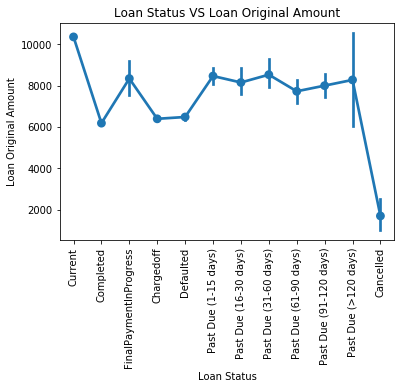

In [47]:
# This plot is loan status vs loan original amount. I wanted to knwo if the borrowers that give more original amount
# will have their loans completed or in final progress. 
color_base = sb.color_palette()[0]
sb.pointplot(data = df, x = 'LoanStatus', y = 'LoanOriginalAmount', color = color_base, order = ['Current','Completed','FinalPaymentInProgress','Chargedoff','Defaulted','Past Due (1-15 days)',
                                                                   'Past Due (16-30 days)','Past Due (31-60 days)',
                                                                   'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)',
                                                                   'Cancelled']);
plt.xticks(rotation=90);
plt.xlabel('Loan Status');
plt.ylabel('Loan Original Amount');
plt.title('Loan Status VS Loan Original Amount');

The current loan has started with the larger original amount. The cancelled loans stared with less original amount. 

C:\Users\owner\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


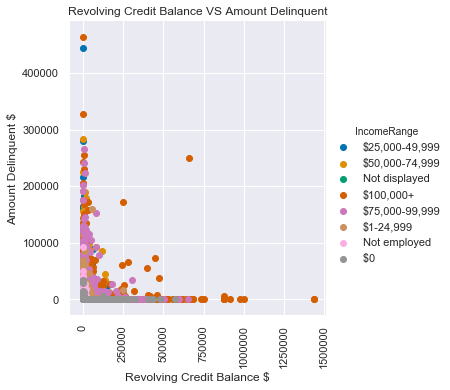

In [245]:
#This plot is Income range vs Revolving credit balance and amount delinquent. Here I wanted to see how the revolving credit
#balance and the amount delinquent correlates with the income range. 
# this is a facetgrid for multivariate data using the main data set as df_clean, the hue as IncomeRange, with size of 5,
# and using the colorbling palette for better understanding. Scatter is the type plot use and on the x we have a rotation
# of 90 degrees. We have the lengend of the Income Range and titles in both axis. 
g = sb.FacetGrid(data = df_clean, hue = 'IncomeRange', size = 5, palette = 'colorblind');
g.map(plt.scatter, 'RevolvingCreditBalance', 'AmountDelinquent');
plt.xticks(rotation=90);
g.add_legend();
plt.title('Revolving Credit Balance, Amount Delinquent and Income Range');
plt.xlabel('Revolving Credit Balance $');
plt.ylabel('Amount Delinquent $');

We can observe that most people with $0 income and $0 amount delinquent still have some revolving credit balance up showing up to 500,000. In the other hand the people with $100,000+ has also not amount delinquent but up to 1,500,000 of revolving credit balance. . In this plot we can see many outliers, but the pattern is most accounts both do not have amount delinquent and do have revolving credit lines or by-reverse. 

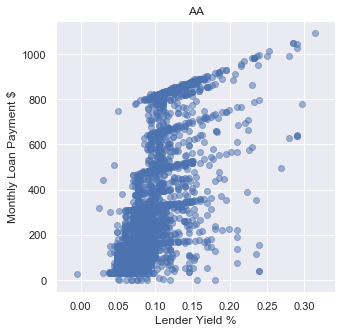

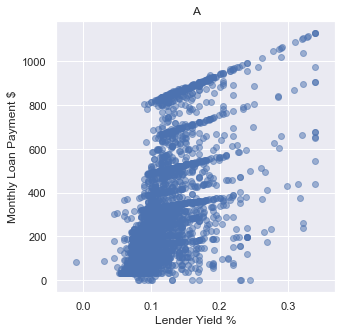

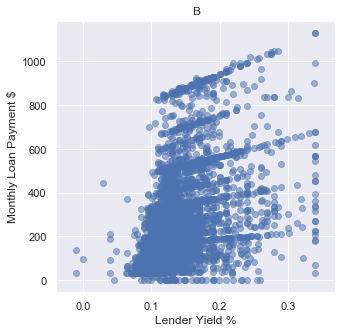

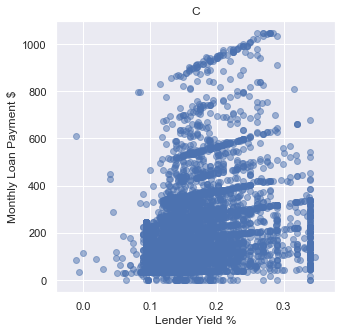

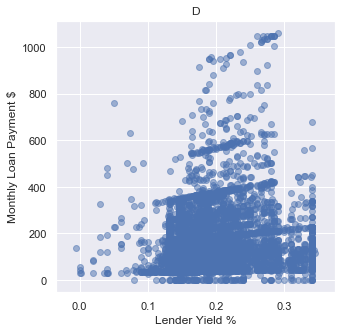

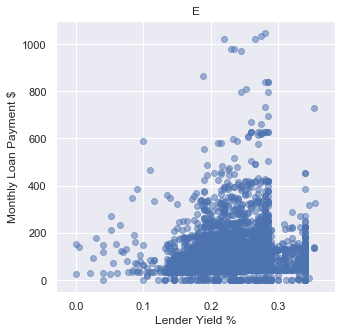

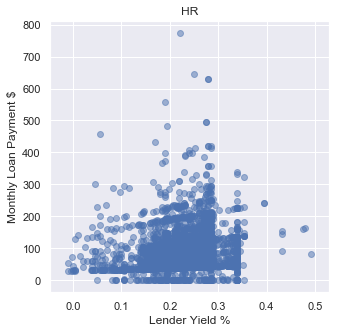

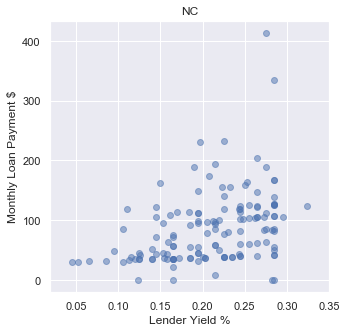

In [255]:
#This plot is credit grade vs lender yield and montly loan payment. In here, I wanted to see how the credit grade affects 
#the lender yield and monthly payments. 
# The loan variable was created as a array with all the Credit grades in it. A for loop is use to capture in the cat variable 
# in the lenght of the loan variable each scatter plot with lender yield and monthly payments. with an intensity of color 
# of 0.5
Loan = ['AA','A','B','C','D','E','HR','NC']

for cat in Loan:
    df2 = df_clean[df_clean['CreditGrade'] == cat]
    plt.scatter(data = df2, x = 'LenderYield', y = 'MonthlyLoanPayment', alpha=0.5)
    plt.title(cat)
    plt.xlabel('Lender Yield %');
    plt.ylabel('Monthly Loan Payment $')
    plt.show()


The best credit grades has the best lender yield. This plot cannot be use on the slide show since the graphs are not shown on one slides. 

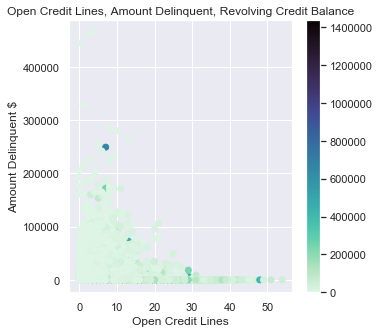

In [246]:
# this plot is Revolving credit balance vs amount delinquent and open credit lines. 
# This is to show how the revolving credit balance correlates with the amount delinquent and the open credit lines. 
# A scatterplot is created with df_clean data. x has the Open Credit Lines, y has the Amount Delinquent and the color bar
# has the Revolving Credit Balance.

plt.scatter(data = df_clean, x = 'OpenCreditLines', y = 'AmountDelinquent', c = 'RevolvingCreditBalance', cmap ='mako_r');
plt.colorbar();
plt.xlabel('Open Credit Lines');
plt.ylabel('Amount Delinquent $');
plt.title('Open Credit Lines, Amount Delinquent, Revolving Credit Balance');

In this plot we can see that most revolving accounst with 100,000 amounts delinquent have about 10 lines of credit open. 

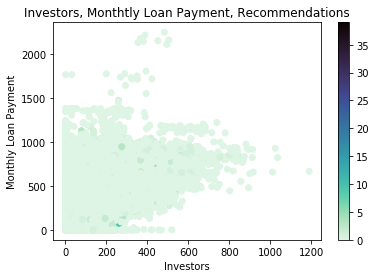

In [90]:
#This plot is Recommendations vs investors and monthly loan payments. This is to know how the borrowers recommendations 
# correlates with the number of investors and the amount of monthly payments. 
plt.scatter(data = df_clean, x = 'Investors', y = 'MonthlyLoanPayment', c = 'Recommendations', cmap ='mako_r');
plt.colorbar();
plt.xlabel('Investors');
plt.ylabel('Monthly Loan Payment $');
plt.title('Investors, Monthtly Loan Payment, Recommendations');

As we saw in the univariable plot of recomendations, there are less than 5 recommendations per loan. The monthly payment is aobut 500 with an average of 200 investors.

Text(0.5, 0, 'Loan Status')

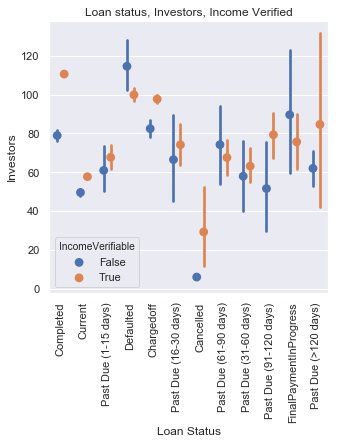

In [247]:
#This plot is Income Verifiable vs loan status and investors. This is to know the correlation of the loan status and the number 
# of investors to the income verification. 
ax = sb.pointplot(data = df_clean, x = 'LoanStatus', y = 'Investors', hue = 'IncomeVerifiable',
                  dodge = 0.3, linestyles = "");
plt.xticks(rotation=90);
plt.title('Loan status, Investors, Income Verified');
plt.xlabel('Loan Status')

In this plot we can observe that the completed loans had more investors and the income was verified.

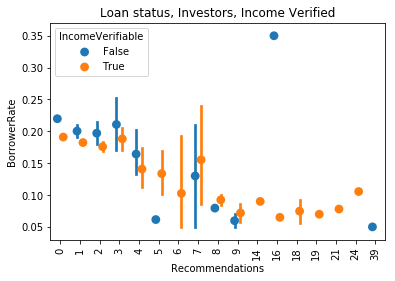

In [106]:
#This plot is income verifiable vs recommendations and borrower rate. I wanted to know if all the true income verifiable 
#had more recommendations and better rate. 
ax = sb.pointplot(data = df_clean, x = 'Recommendations', y = 'BorrowerRate', hue = 'IncomeVerifiable',
                  dodge = 0.3, linestyles = "");
plt.xticks(rotation=90);
plt.title('Loan status, Investors, Income Verified');

We can see in this plot that the borrowed rate decrease and the recommendation increase. This is a negative correlation. 

In [257]:
df_clean.to_csv("prosper_cleaned.csv")